# Plot Fit Error for QNM Frequencies

In [1]:
# Setup ipython environment
# %load_ext autoreload
# %autoreload 2
# %matplotlib inline
# Import needed packages from positive
from positive import *
# Import other usefuls
from os.path import expanduser
from kerr import *
import pickle
from numpy import *
from scipy.io import loadmat
# Import MATLAB derived cwfit
from kerr.formula.ksm2_cw import CW as cwfit
#
from matplotlib.pyplot import *

(positive)>> Applying custom matplotlib settings.


## Generate Fit Residuals

In [3]:
#
N = 61
jf_lim = 0.995
jf = jf_lim*sin(linspace(-pi/2,pi/2,N))

# figure()
# ax = gca()

#
cw,cw2 = {},{}
CW = {}
for k in cwfit.keys():#( (2,2,0), (2,1,0) ):#cwfit.keys():
    l,m,n = k
    if m>0:
        CW[k] = array( [ leaver( j, l,m,n )[0] for j in jf ] )
        #cw[k] = cwfit[k](jf)
        cw[k] = cw181003550(jf,*k)
        try:
            cw2[k] = Berti0512160( jf,l,m,n )
        except:
            cw2[k] = jf/0
        
        #sca(ax)
#         figure()
#         msk = jf>-100
#         plot( CW[k].real[msk], CW[k].imag[msk], label='Leaver' )
#         plot( cw[k].real[msk],-cw[k].imag[msk], ls='--', color='k', label='London' )
#         plot( cw2[k].real[msk],-cw2[k].imag[msk], label='Berti+' )
#         title(k)
#         legend()
        

/Users/book/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in divide
/Users/book/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in divide


In [4]:


res = {}
res2 = {}
pres = {}
pres2= {}
for k in cw.keys():
    res[k] = CW[k]-cw[k].conj()
    res2[k] = CW[k]-cw2[k].conj()
    
    pres[k] = 100*abs(res[k]/CW[k])
    pres2[k]= 100*abs(res2[k]/CW[k])
    #figure()
    #msk = jf>-100
    #plot( CW[k].real[msk], CW[k].imag[msk], label='Leaver' )
    #plot( cw[k].real[msk], cw[k].conj().imag[msk], ls='--', color='k', label='London' )
    #plot( cw2[k].real[msk], cw2[k].conj().imag[msk], label='Berti+' )
    
    #plot( jf[msk], CW[k].imag[msk], label='Leaver'  )
    #plot( jf[msk], cw[k].conj().imag[msk], label='London'  )
    #plot( jf[msk], cw2[k].conj().imag[msk], label='Berti+'  )
    
    #plot( jf[msk], CW[k].imag[msk], label='Leaver'  )
    #plot( jf[msk], CW[k].imag[msk]-cw[k].conj().imag[msk], label='London'  )
    #print cw2[k].shape
    #print CW[k].shape
    #plot( jf[msk], (CW[k].imag-cw2[k].conj().imag)[msk], label='Berti+'  )
    
    #plot( jf[msk], CW[k].imag[msk]-cw[k].conj().imag[msk], label='London'  )
    #plot( jf[msk], CW[k].imag[msk]-cw2[k].conj().imag[msk], label='Berti+'  )
    
    #title(k)
    #legend()

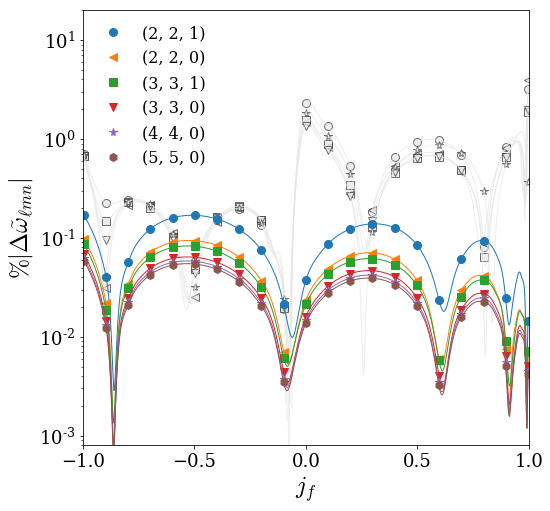

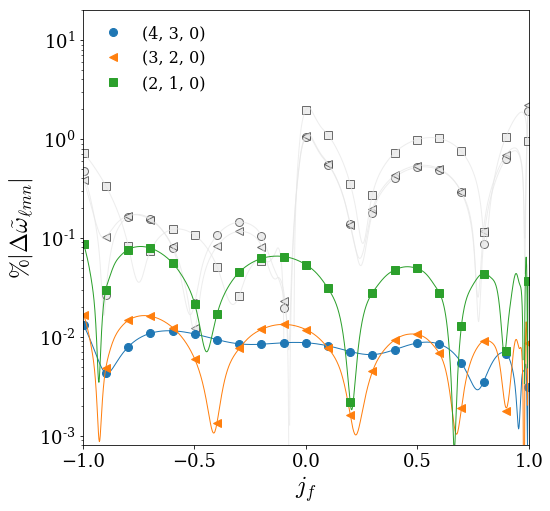

In [5]:

import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = mpl.rcParams['xtick.labelsize'] 

# import matplotlib.style
# import matplotlib as mpl
# mpl.style.use('seaborn')

# fig = figure( figsize = 2*figaspect(1) )
# ax1 = gca()
# subplots_adjust(hspace = .05)

# fig = figure( figsize = 2*figaspect(1) )
# ax2 = gca()
# subplots_adjust(hspace = .05)

fig = figure( figsize = 2*figaspect(1) )
ax3 = gca()
subplots_adjust(hspace = .05)

fig = figure( figsize = 2*figaspect(1) )
ax4 = gca()
subplots_adjust(hspace = .05)


fs = 12

zlist = [ (2,2,0), (2,2,1), (3,3,0), (3,3,1), (4,4,0), (4,3,0), (5,5,0), (3,2,0), (2,1,0) ]
# zlistA = [ (2,2,0), (3,3,0), (4,4,0), (5,5,0) ]
zlistA = [ (2,2,1), (2,2,0), (3,3,1), (3,3,0), (4,4,0), (5,5,0) ]
zlistB = [  (4,3,0), (3,2,0), (2,1,0) ]
mkrlist = 'o<sv*h>^pXDo<vs*h>p*'
lw,ms = 1,8
# clr = 0.8*rgb( len(zlist) )
clr = 0.8*rgb( len(zlist), grayscale=True )

jf_spots = linspace(-1,1,21)*jf_lim

# sca(ax1)
# xticks([])
# for k,z in enumerate(zlist):
#     plot( jf, res[z].real, color=clr[k], lw=lw )
#     plot( jf, res2[z].real, color='r', lw=lw, alpha=0.1 )
#     plot( jf_spots, spline(jf,res[z].real)(jf_spots), ls='none',
#          color=clr[k], marker=mkrlist[k], mec=0.8*clr[k], ms=ms, label=str(z)  )
# #
# legend(loc='best',mode='expand',ncol=4)
# ylabel(r'$\Delta \; \omega_{\ell m n}$')

# sca(ax2)    
# for k,z in enumerate(zlist):
#     plot( jf, res[z].imag, color=clr[k], lw=lw )
#     plot( jf, res2[z].imag, color='r', lw=lw, alpha=0.1 )
#     plot( jf_spots, spline(jf,res[z].imag)(jf_spots), color=clr[k], marker=mkrlist[k], mec=0.8*clr[k], ms=ms  )
    

#
def plotmks(X,Y,n,lw=1,marker=None,ms=10,color=None,zorder=-10,k=5,mec=None,alpha=1,label=None):
    
    X_spots = linspace(X[0],X[-1],n)
    
    p = plot( X_spots, spline(X,Y)(X_spots),ls='none', marker=marker, mec=mec, ms=ms, color=color,zorder=zorder,alpha=alpha,label=label  )
    XX = linspace(X[0],X[-1],1e3)
    clr = array([int(p[0].get_color().lstrip('#')[i:i+2], 16) for i in (0, 2 ,4)])/255.0 if isinstance(p[0].get_color(),str) else p[0].get_color()
    p1 =plot(XX,spline(X,Y,k=k)(XX),lw=lw,color=clr,zorder=zorder,alpha=alpha)
    #lo = p1[0]
    #lo.set_color( array([int(p[0].get_color().lstrip('#')[i:i+2], 16) for i in (0, 2 ,4)])/255 )
    
    
    
sca(ax3)    
for k,z in enumerate(zlistA):
    
    #plot( jf, pres2[z],marker=mkrlist[k], color=0.9*ones(3), ms=ms, alpha = 0.5, mec='k', lw=lw )
    
    plotmks( jf, pres2[z], 21, lw=lw,ms=ms,marker=mkrlist[k], color=0.9*ones(3),zorder=-100,k=2,mec=0.2*ones(3),alpha=0.7  )
    
    plotmks( jf, pres[z], 21, lw=lw,ms=ms,marker=mkrlist[k], label=str(z)  )
    
sca(ax4)    
for k,z in enumerate(zlistB):
    plotmks( jf, pres2[z], 21, lw=lw,ms=ms,marker=mkrlist[k], color=0.9*ones(3),zorder=-100,k=2,mec=0.2*ones(3),alpha=0.7  )
    plotmks( jf, pres[z], 21, lw=lw,ms=ms,marker=mkrlist[k], label=str(z)  )
#     plot( jf, 100*abs(res2[z]/CW[z]),marker=mkrlist[k], color=0.9*ones(3), ms=ms, alpha = 0.5, mec='k', lw=lw )
#     p = plot( jf_spots, 100*spline(jf,abs(res[z]/CW[z]))(jf_spots),ls='none', marker=mkrlist[k], ms=ms, label=str(z)  )
    
#     jj = linspace(jf[0],jf[-1],1e3)
#     p1 =plot( jj,spline(jf, 100*abs(res[z]/CW[z]))(jj), color=clr[k], lw=lw )
#     lo = p1[0]
#     lo.set_color( array([int(p[0].get_color().lstrip('#')[i:i+2], 16) for i in (0, 2 ,4)])/255.0 )
    

    
# #
# for ax in [ax1,ax2]:
#     #
#     sca(ax)
#     xlabel('$j_f$')
#     ylabel(r'$\Delta \; (1/\tau_{\ell m n})$')
#     xlim([-1,1])
#     ylim(1e-3*array([-1,1]))
    
#
for k,ax in enumerate([ax3,ax4]):
    sca(ax)
    xlabel('$j_f$',fontsize=24)
    ylabel(r'$\%|\Delta\tilde\omega_{ \ell m n}|$',fontsize=24)
    xlim([-1,1])
    yscale('log')
    legend(ncol=1,fontsize=16,frameon=not True,loc=2)
    ylim( [8e-4,2e1] )
    xticks( linspace(-1,1,5) )
    
    savefig('/Users/book/KOALA/positive_dev/docs/mvfits_paper/res_cw_%i.pdf'%k,pad_inches=0, bbox_inches='tight')

    
#
# savefig('/Users/book/KOALA/positive_dev/docs/mvfits_paper/fig/fits_res2.pdf',pad_inches=0, bbox_inches='tight')


In [109]:
from numpy import *

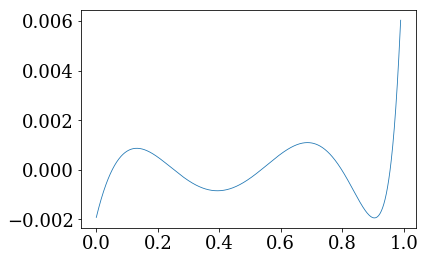

In [119]:


jf = linspace(0.0,0.99,1e3)

cw = array([leaver(j,2,1,0)[0] for j in jf])
figure()
plot( jf,cw.real-polyval(polyfit(jf,cw.real,4),jf) )
# figure()
# from scipy.fftpack import fft,fftshift,fftfreq
# plot( fftshift(fftfreq(len(jf),diff(jf)[0])), abs(fftshift(fft(cw.imag))) ) 
# yscale('log')
# xscale('log')

In [112]:
?polyval